<h2> We chose the School System Finances dataset.</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import datetime as dt
import matplotlib.dates as mdates
# import folium
import missingno as msno
import seaborn as sns
sns.set()
import statsmodels.api as sm
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
%matplotlib inline

In [2]:
sf = pd.read_csv('School Finances.csv', index_col=False)

/Applications/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
sf.head()

,STATE,IDCENSUS,NAME,CONUM,CSA,CBSA,SCHLEV,NCESID,YRDATA,V33,...,V32,_19H,_21F,_31F,_41F,_61V,_66V,W01,W31,W61
0,1,1.500100e+12,AUTAUGA COUNTY SCHOOL DISTRICT,1001,N,33860,3,100240,15,9664,...,0,49431,16603,2992,63042,0,0,2094,372,8617
1,1,1.500200e+12,BALDWIN COUNTY SCHOOL DISTRICT,1003,380,19300,3,100270,15,30596,...,0,337160,99087,13027,423220,0,0,5784,50441,71370
2,1,1.500300e+12,BARBOUR COUNTY SCHOOL DISTRICT,1005,N,N,3,100300,15,925,...,0,8024,0,304,7720,0,0,0,0,646
3,1,1.500300e+12,EUFAULA CITY SCHOOL DISTRICT,1005,N,N,3,101410,15,2829,...,0,0,0,0,0,0,0,0,2054,7478
4,1,1.500400e+12,BIBB COUNTY SCHOOL DISTRICT,1007,142,13820,3,100360,15,3357,...,0,22155,0,1190,20965,0,0,1397,790,5400


In [4]:
sf.shape

(14376, 141)

In [5]:
sf.columns

Index(['STATE', 'IDCENSUS', 'NAME', 'CONUM', 'CSA', 'CBSA', 'SCHLEV', 'NCESID',
       'YRDATA', 'V33',
       ...
       'V32', '_19H', '_21F', '_31F', '_41F', '_61V', '_66V', 'W01', 'W31',
       'W61'],
      dtype='object', length=141)

In [6]:
finances = sf[['STATE', 'IDCENSUS', 'NAME', 'SCHLEV', 'V33', 'TOTALREV', 'TFEDREV', 'C14', 'C15', 'C16', 'C17', 'TSTREV', 'C04', 'C05', 'C07', 'C12', 'TLOCREV', 'T06', 'D23', 'A09', 'A13', 'A20', 'U50', 'U97', 'TOTALEXP', 'TCURELSC', 'E13', 'TCURSSVC', 'TCUROTH', 'NONELSEC', 'TCAPOUT', 'F12', 'G15', 'K09', 'Z32', 'Z33', 'Z34']]

In [7]:
finances.head()

,STATE,IDCENSUS,NAME,SCHLEV,V33,TOTALREV,TFEDREV,C14,C15,C16,...,TCURSSVC,TCUROTH,NONELSEC,TCAPOUT,F12,G15,K09,Z32,Z33,Z34
0,1,1.500100e+12,AUTAUGA COUNTY SCHOOL DISTRICT,3,9664,79665,7574,1791,2179,259,...,23217,5570,1010,691,529,0,0,42440,28822,17720
1,1,1.500200e+12,BALDWIN COUNTY SCHOOL DISTRICT,3,30596,330317,23602,5729,7207,811,...,99682,14578,4957,13256,8737,21,481,153812,101788,60668
2,1,1.500300e+12,BARBOUR COUNTY SCHOOL DISTRICT,3,925,10519,2518,1279,323,153,...,3835,873,145,0,0,0,0,5317,3206,2100
3,1,1.500300e+12,EUFAULA CITY SCHOOL DISTRICT,3,2829,26076,3374,1035,596,139,...,7494,1851,333,990,777,0,32,13627,9247,5667
4,1,1.500400e+12,BIBB COUNTY SCHOOL DISTRICT,3,3357,31825,3586,856,980,220,...,10822,2292,658,858,199,132,35,16925,10820,7005


In [8]:
finances.describe()

,STATE,IDCENSUS,SCHLEV,V33,TOTALREV,TFEDREV,C14,C15,C16,C17,...,TCURSSVC,TCUROTH,NONELSEC,TCAPOUT,F12,G15,K09,Z32,Z33,Z34
count,14376.000000,1.437600e+04,14376.000000,14376.000000,1.437600e+04,1.437600e+04,14376.000000,14376.000000,14376.000000,14376.000000,...,1.437600e+04,14376.000000,14376.000000,1.437600e+04,1.437600e+04,14376.000000,14376.000000,1.437600e+04,1.437600e+04,1.437600e+04
mean,26.801336,2.728090e+13,2.883139,3374.682526,4.546951e+04,3.708038e+03,915.914858,752.781093,97.466055,7.383278,...,1.352417e+04,1625.927309,390.802657,3.627027e+03,2.751908e+03,215.163189,153.054535,2.240621e+04,1.509107e+04,7.978090e+03
std,13.894331,1.389514e+13,1.271649,14419.737037,2.590623e+05,2.021328e+04,5972.748111,3619.184513,598.404925,74.283373,...,5.894857e+04,7558.732209,2607.081469,2.614211e+04,2.428852e+04,1752.902688,974.844194,1.170061e+05,9.008237e+04,6.136424e+04
min,1.000000,1.500100e+12,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,15.000000,1.550330e+13,3.000000,305.000000,5.241500e+03,2.920000e+02,54.000000,0.000000,0.000000,0.000000,...,1.577000e+03,170.000000,0.000000,1.260000e+02,0.000000e+00,0.000000,0.000000,2.439750e+03,1.580750e+03,6.927500e+02
50%,27.000000,2.750320e+13,3.000000,979.500000,1.402300e+04,8.470000e+02,180.000000,118.000000,10.000000,0.000000,...,4.279500e+03,470.000000,9.000000,5.060000e+02,1.310000e+02,0.000000,21.000000,6.580000e+03,4.387000e+03,2.181000e+03
75%,38.000000,3.850050e+13,3.000000,2744.250000,3.791375e+04,2.433500e+03,545.250000,532.000000,61.000000,0.000000,...,1.153675e+04,1250.000000,145.000000,1.923500e+03,1.050250e+03,2.000000,100.000000,1.831050e+04,1.219875e+04,6.485500e+03
max,51.000000,5.150230e+13,7.000000,995192.000000,2.543738e+07,1.307783e+06,379531.000000,248209.000000,43253.000000,3073.000000,...,4.694906e+06,538505.000000,134959.000000,2.623719e+06,2.498536e+06,73907.000000,80941.000000,1.092264e+07,9.118350e+06,6.558472e+06


In [9]:
finances.columns

Index(['STATE', 'IDCENSUS', 'NAME', 'SCHLEV', 'V33', 'TOTALREV', 'TFEDREV',
       'C14', 'C15', 'C16', 'C17', 'TSTREV', 'C04', 'C05', 'C07', 'C12',
       'TLOCREV', 'T06', 'D23', 'A09', 'A13', 'A20', 'U50', 'U97', 'TOTALEXP',
       'TCURELSC', 'E13', 'TCURSSVC', 'TCUROTH', 'NONELSEC', 'TCAPOUT', 'F12',
       'G15', 'K09', 'Z32', 'Z33', 'Z34'],
      dtype='object')

In [10]:
finances = finances.rename(index=str, columns={'V33': 'ENROLLMENT', 'C14': 'FED_TITLE1', 'C15': 'FED_DISABILITIES', 'C16': 'FED_STEM', 'C17': 'FED_DRUGS', 'C04': 'STATE_STAFF', 'C05': 'STATE_SPECIAL_ED', 'C07': 'STATE_BILING', 'C12': 'STATE_TRANSPORTATION', 'T06': 'LOCAL_PROPERTY', 'D23': 'LOCAL_REV_CITIES_COUNTIES', 'A09': 'LOCAL_LUNCH', 'A13': 'LOCAL_DISTRICT_ACTIVITY', 'A20': 'LOCAL_OTHER', 'U50': 'LOCAL_PRIVATE', 'U97': 'LOCAL_MISCELLANEOUS', 'E13': 'INSTRUCT_EXP', 'F12': 'CONSTRUCTION_EXP', 'G15': 'LAND_EXP', 'K09': 'INSTRUCTIONAL_EXP', 'Z32': 'TOTSALS', 'Z33': 'TOTSALS_INSTRUCTION', 'Z34': 'TOT_EMPLOY_BENEFITS'})

<h2>Column Information:</h2> <br>
<b>STATE</b> - State Identification Number <br>
<b>IDCENSUS</b> - School System Identification Number <br>
<b>NAME</b> - School System Name <br>
<b>SCHLEV</b> - School Level Code
<!---<ul>
    <li>01 - Elementary School System Only </li>
    <li>02 - Secondary School System Only </li>
    <li>03 - Elementary-Secondary School System </li>
    <li>05 - Vocational or Special Education School System </li>
    <li>06 - Nonoperating School System </li>
    <li>07 - Educational Service Agency </li>
</ul>--->
<br>
<b>ENROLLMENT</b> - Fall Membership <br>
<b>TOTALREV</b> - Total Elementary-Secondary Revenue <br>
<b>TFEDREV</b> - Total Revenue from Federal Sources <br>
FED_TITLE1 - Federal revenue through the state - Title 1<br>
FED_DISABILITIES - Federal revenue through the state - Children with disabilities - IDEA <br>
FED_STEM - Federal revnue through the state - Math, science, and teacher quality <br>
FED_DRUGS - Federal revenue through the state - Safe and drug-free schools <br>
<b>TSTREV</b> - Total Revenue from State Sources <br>
STATE_STAFF - Staff improvement programs <br>
STATE_SPECIAL_ED - Special education programs <br>
STATE_BILING - Bilingual education programs <br>
STATE_TRANSPORTATION - Transporation programs <br>
<b>TLOCREV</b> - Total Revenue from Local Sources <br>
LOCAL_PROPERTY - Property taxes <br>
LOCAL_REV_CITIES_COUNTIES - Revenue from cities and countries <br>
LOCAL_LUNCH - School lunch revenues <br>
LOCAL_DISTRICT_ACTIVITY - District activity receipts <br>
LOCAL_OTHER - Other sales and service revenues <br>
LOCAL_PRIVATE - Private contributions <br>
LOCAL_MISCELLANEOUS - Miscellaneous other local revenues <br>
<b>TOTALEXP</b> - Total Elementary-Secondary Expenditure <br>
<b>TCURELSC</b> - Total Current Spending for Elementary-Secondary Programs <br>
INSTRUCT_EXP - Current operation expenditure - Instruction <br>
<b>TCURSSVC</b> Total Current Spending for Support Services <br>
<b>TCUROTH</b> - Total Current Spending for Other Elementary-Secondary Programs <br>
<b>NONELESC</b> - Total Current Spending For Nonelementary-Secondary Programs <br>
<b>TCAPOUT</b> - Total Capital Outlay Expenditure <br>
CONSTRUCTION_EXP - Construction <br>
LAND_EXP - Purchase of land and existing structures <br>
INSTRUCTIONAL_EXP - Instructional equipment <br>
TOTSALS - Total salaries and wages <br>
TOTSALS_INSTRUCTION - Total salaries and wages - Instruction <br>
TOT_EMPLOY_BENEFITS - Total employee benefit payments

<h2>Dividing data into different dataframes</h2>

In [11]:
fed_sources = finances[['STATE', 'IDCENSUS', 'NAME', 'SCHLEV', 'ENROLLMENT', 'FED_TITLE1', 'FED_DISABILITIES', 'FED_STEM', 'FED_DRUGS']]
state_sources = finances[['STATE', 'IDCENSUS', 'NAME', 'SCHLEV', 'ENROLLMENT', 'STATE_STAFF', 'STATE_SPECIAL_ED', 'STATE_BILING', 'STATE_TRANSPORTATION']]
local_sources = finances[['STATE', 'IDCENSUS', 'NAME', 'SCHLEV', 'ENROLLMENT', 'LOCAL_PROPERTY', 'LOCAL_REV_CITIES_COUNTIES', 'LOCAL_LUNCH', 'LOCAL_DISTRICT_ACTIVITY', 'LOCAL_OTHER', 'LOCAL_PRIVATE', 'LOCAL_MISCELLANEOUS']]

In [12]:
berkeley_finances = finances[finances.NAME == 'BERKELEY UNIFIED SCH DIST']
berkeley_finances

,STATE,IDCENSUS,NAME,SCHLEV,ENROLLMENT,TOTALREV,TFEDREV,FED_TITLE1,FED_DISABILITIES,FED_STEM,...,TCURSSVC,TCUROTH,NONELSEC,TCAPOUT,CONSTRUCTION_EXP,LAND_EXP,INSTRUCTIONAL_EXP,TOTSALS,TOTSALS_INSTRUCTION,TOT_EMPLOY_BENEFITS
739,5,5.500100e+12,BERKELEY UNIFIED SCH DIST,3,10442,171671,8331,730,2058,264,...,52396,3457,8961,15014,13550,1363,8,87395,50742,26959


In [13]:
# Amount spent per student in Berkeley Unified School District:
print(int(berkeley_finances.TOTALEXP) * 1000 / int(berkeley_finances.ENROLLMENT))

16146.044819000192


In [14]:
finances.describe()

,STATE,IDCENSUS,SCHLEV,ENROLLMENT,TOTALREV,TFEDREV,FED_TITLE1,FED_DISABILITIES,FED_STEM,FED_DRUGS,...,TCURSSVC,TCUROTH,NONELSEC,TCAPOUT,CONSTRUCTION_EXP,LAND_EXP,INSTRUCTIONAL_EXP,TOTSALS,TOTSALS_INSTRUCTION,TOT_EMPLOY_BENEFITS
count,14376.000000,1.437600e+04,14376.000000,14376.000000,1.437600e+04,1.437600e+04,14376.000000,14376.000000,14376.000000,14376.000000,...,1.437600e+04,14376.000000,14376.000000,1.437600e+04,1.437600e+04,14376.000000,14376.000000,1.437600e+04,1.437600e+04,1.437600e+04
mean,26.801336,2.728090e+13,2.883139,3374.682526,4.546951e+04,3.708038e+03,915.914858,752.781093,97.466055,7.383278,...,1.352417e+04,1625.927309,390.802657,3.627027e+03,2.751908e+03,215.163189,153.054535,2.240621e+04,1.509107e+04,7.978090e+03
std,13.894331,1.389514e+13,1.271649,14419.737037,2.590623e+05,2.021328e+04,5972.748111,3619.184513,598.404925,74.283373,...,5.894857e+04,7558.732209,2607.081469,2.614211e+04,2.428852e+04,1752.902688,974.844194,1.170061e+05,9.008237e+04,6.136424e+04
min,1.000000,1.500100e+12,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,15.000000,1.550330e+13,3.000000,305.000000,5.241500e+03,2.920000e+02,54.000000,0.000000,0.000000,0.000000,...,1.577000e+03,170.000000,0.000000,1.260000e+02,0.000000e+00,0.000000,0.000000,2.439750e+03,1.580750e+03,6.927500e+02
50%,27.000000,2.750320e+13,3.000000,979.500000,1.402300e+04,8.470000e+02,180.000000,118.000000,10.000000,0.000000,...,4.279500e+03,470.000000,9.000000,5.060000e+02,1.310000e+02,0.000000,21.000000,6.580000e+03,4.387000e+03,2.181000e+03
75%,38.000000,3.850050e+13,3.000000,2744.250000,3.791375e+04,2.433500e+03,545.250000,532.000000,61.000000,0.000000,...,1.153675e+04,1250.000000,145.000000,1.923500e+03,1.050250e+03,2.000000,100.000000,1.831050e+04,1.219875e+04,6.485500e+03
max,51.000000,5.150230e+13,7.000000,995192.000000,2.543738e+07,1.307783e+06,379531.000000,248209.000000,43253.000000,3073.000000,...,4.694906e+06,538505.000000,134959.000000,2.623719e+06,2.498536e+06,73907.000000,80941.000000,1.092264e+07,9.118350e+06,6.558472e+06


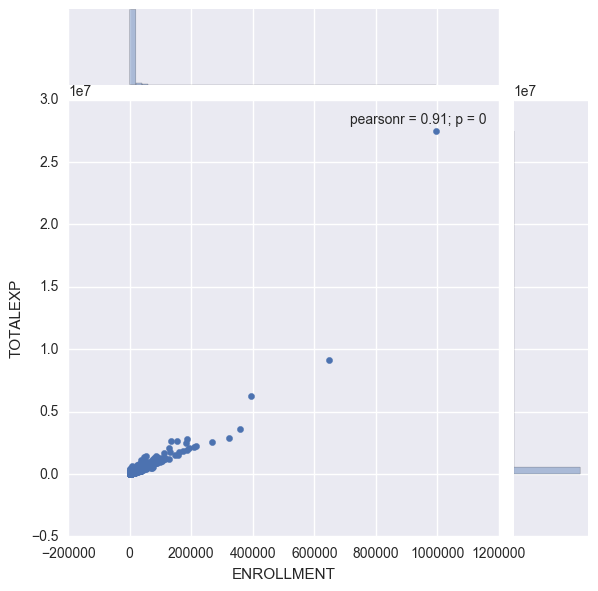

In [15]:
sns.jointplot('ENROLLMENT', 'TOTALEXP', data=finances)

/Applications/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


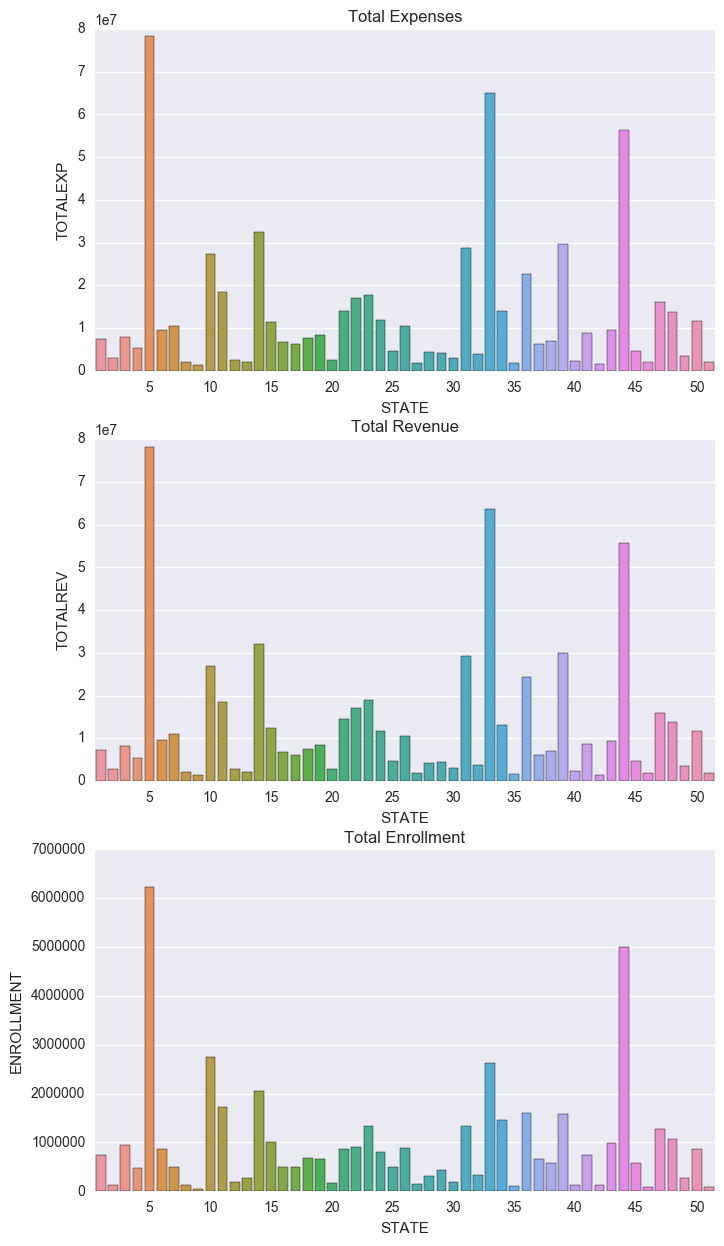

In [16]:
fig, ax = plt.subplots(3,1, figsize=(8, 15))

totalexp = sns.barplot(x='STATE', y='TOTALEXP', data=finances, estimator=sum, ci=None, ax=ax[0])
totalexp.set_xticks([4, 9, 14, 19, 24, 29, 34, 39, 44, 49])
totalexp.set_xticklabels([5, 10, 15, 20, 25, 30, 35, 40, 45, 50])
totalexp.set_title("Total Expenses")

totalrev = sns.barplot(x='STATE', y='TOTALREV', data=finances, estimator=sum, ci=None, ax=ax[1])
totalrev.set_xticks([4, 9, 14, 19, 24, 29, 34, 39, 44, 49])
totalrev.set_xticklabels([5, 10, 15, 20, 25, 30, 35, 40, 45, 50])
totalrev.set_title("Total Revenue")

enrollment = sns.barplot(x='STATE', y='ENROLLMENT', data=finances, estimator=sum, ci=None, ax=ax[2])
enrollment.set_xticks([4, 9, 14, 19, 24, 29, 34, 39, 44, 49])
enrollment.set_xticklabels([5, 10, 15, 20, 25, 30, 35, 40, 45, 50])
enrollment.set_title("Total Enrollment")

fig.show()

/Applications/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


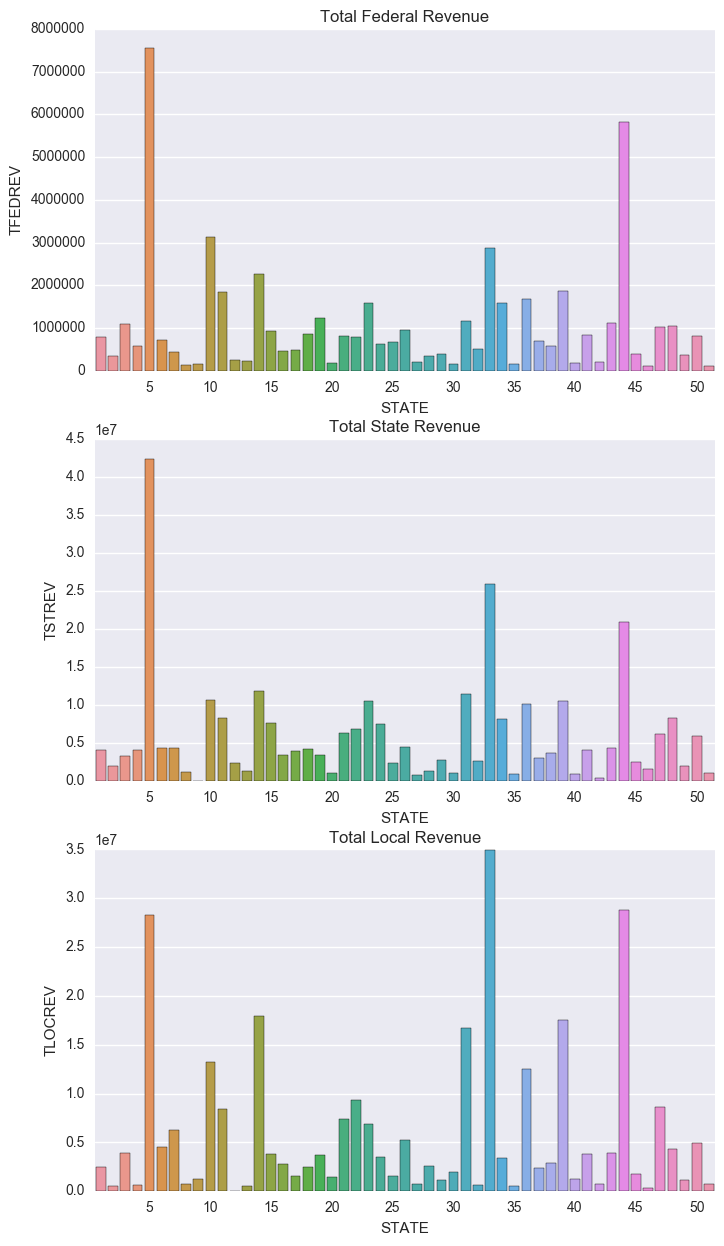

In [17]:
fig, ax = plt.subplots(3,1, figsize=(8, 15))

tfedrev = sns.barplot(x='STATE', y='TFEDREV', data=finances, estimator=sum, ci=None, ax=ax[0])
tfedrev.set_xticks([4, 9, 14, 19, 24, 29, 34, 39, 44, 49])
tfedrev.set_xticklabels([5, 10, 15, 20, 25, 30, 35, 40, 45, 50])
tfedrev.set_title("Total Federal Revenue")

tstrev = sns.barplot(x='STATE', y='TSTREV', data=finances, estimator=sum, ci=None, ax=ax[1])
tstrev.set_xticks([4, 9, 14, 19, 24, 29, 34, 39, 44, 49])
tstrev.set_xticklabels([5, 10, 15, 20, 25, 30, 35, 40, 45, 50])
tstrev.set_title("Total State Revenue")

tlocrev = sns.barplot(x='STATE', y='TLOCREV', data=finances, estimator=sum, ci=None, ax=ax[2])
tlocrev.set_xticks([4, 9, 14, 19, 24, 29, 34, 39, 44, 49])
tlocrev.set_xticklabels([5, 10, 15, 20, 25, 30, 35, 40, 45, 50])
tlocrev.set_title("Total Local Revenue")

fig.show()

In [18]:
import plotly.plotly as py
import plotly.graph_objs as go

title1 = fed_sources["FED_TITLE1"]
disabilities = fed_sources["FED_DISABILITIES"]
stem = fed_sources["FED_STEM"]
drugs = fed_sources["FED_DRUGS"]

labels = ['Title 1', 'Children with disabilities - IDEA', 'Math, science, and teacher quality', 'Safe and drug-free schools']
values = [sum(title1), sum(disabilities), sum(stem), sum(drugs)]

trace = go.Pie(labels = labels, values = values, name = "Total Revenue From Federal Sources")

py.iplot([trace], filename = 'basic_pie_chart')

Aw, snap! We don't have an account for ''. Want to try again? You can authenticate with your email address or username. Sign in is not case sensitive.

Don't have an account? plot.ly

Questions? support@plot.ly


PlotlyError: Because you didn't supply a 'file_id' in the call, we're assuming you're trying to snag a figure from a url. You supplied the url, '', we expected it to start with 'https://plot.ly'.
Run help on this function for more information.

In [19]:
staff = state_sources["STATE_STAFF"]
specialEd = state_sources["STATE_SPECIAL_ED"]
biling = state_sources["STATE_BILING"]
transportation = state_sources["STATE_TRANSPORTATION"]

labels = ["Staff improvement programs", "Special education programs", "Bilingual education programs", "Transporation programs"]
values = [sum(staff), sum(specialEd), sum(biling), sum(transportation)]

trace = go.Pie(labels = labels, values = values, name = "Total Revenue From State Sources")

py.iplot([trace], filename = 'basic_pie_chart')

Aw, snap! We don't have an account for ''. Want to try again? You can authenticate with your email address or username. Sign in is not case sensitive.

Don't have an account? plot.ly

Questions? support@plot.ly


PlotlyError: Because you didn't supply a 'file_id' in the call, we're assuming you're trying to snag a figure from a url. You supplied the url, '', we expected it to start with 'https://plot.ly'.
Run help on this function for more information.

In [20]:
property = local_sources["LOCAL_PROPERTY"]
cities = local_sources["LOCAL_REV_CITIES_COUNTIES"]
lunch = local_sources["LOCAL_LUNCH"]
district = local_sources["LOCAL_DISTRICT_ACTIVITY"]
other = local_sources["LOCAL_OTHER"]
private = local_sources["LOCAL_PRIVATE"]
misc = local_sources["LOCAL_MISCELLANEOUS"]


labels = ["Property taxes", "Revenue from cities and counties", "School lunch revenues", "Distrinct activity receipts", "Other sales and service revenues", "Private contributions", "Miscellaneous other local revenues"]
values = [sum(property), sum(cities), sum(lunch), sum(district), sum(other), sum(private), sum(misc)]

trace = go.Pie(labels = labels, values = values, name = "Total Revenue Local Sources")

py.iplot([trace], filename = 'basic_pie_chart')

Aw, snap! We don't have an account for ''. Want to try again? You can authenticate with your email address or username. Sign in is not case sensitive.

Don't have an account? plot.ly

Questions? support@plot.ly


PlotlyError: Because you didn't supply a 'file_id' in the call, we're assuming you're trying to snag a figure from a url. You supplied the url, '', we expected it to start with 'https://plot.ly'.
Run help on this function for more information.

In [21]:
fed_sources['SCHLEV'].unique()

array([3, 1, 5, 2, 6, 7])

### Logistic regression to determine School level (SCHLEV) based on enrollment:

In [22]:
#split into training and testing sets
X = state_sources['ENROLLMENT']
Y = np.array(state_sources['SCHLEV'])

np.unique(Y)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
X_train, Y_train = X_train.reshape(10063,1), y_train.reshape(10063,)

The different labels of the training data are for the 6 different type of public school districts, which are:

- 01 - Elementary School Only
- 02 - Secondary School Only
- 03 - Elementary-Secondary School system
- 05 - Vocational or Special Education School System
- 06 - Nonoperating School System
- 07 - Educational Service Agency

In [23]:
np.unique(y_train)

array([1, 2, 3, 5, 6, 7])

In [24]:
#Prediction for training data
model = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs')
model.fit(X_train, Y_train)
model.score(X_train, Y_train)

0.77650799960250427

In [25]:
#Predict labels for test data, and determine accuracy 
X_test = X_test.reshape(-1,1)
predicted = model.predict(X_test)
print (predicted)

[3 3 3 ..., 3 3 3]


0.783909111987


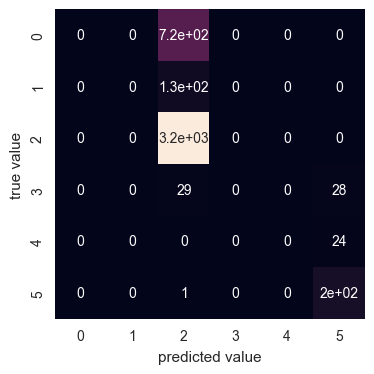

In [26]:
#Get test accuracy, and confusion matrix
print (metrics.accuracy_score(y_test, predicted))
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, predicted)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

plt.show()

This confusion matrix shows that logistic regression is probably not the right method to approach this prediction model and/or the data is not very useful.

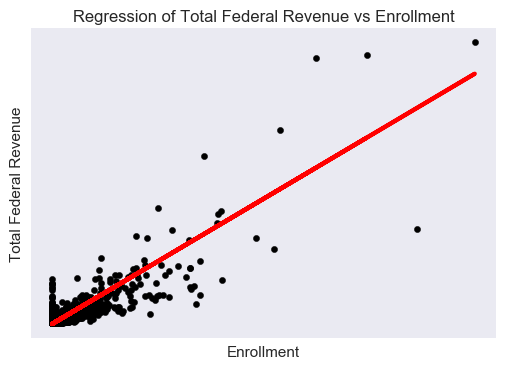

Coefficients: 
 [[ 1.33330816]]
Mean squared error: 42046321.44
Variance score: 0.73


In [27]:
from sklearn import datasets, linear_model
 
# Plot Axes
X = fed_sources['ENROLLMENT']
Y = finances['TFEDREV']
 
X = X.reshape(len(X),1)
Y = Y.reshape(len(Y),1)

dimension = 4500
# Split the data into training/testing sets
X_train = X[:-dimension]
X_test = X[-dimension:]
 
# Split the targets into training/testing sets
Y_train = Y[:-dimension]
Y_test = Y[-dimension:]
 
# Plot outputs
plt.scatter(X_test, Y_test,  color='black')
plt.title('Regression of Total Federal Revenue vs Enrollment')
plt.xlabel('Enrollment')
plt.ylabel('Total Federal Revenue')
plt.xticks(())
plt.yticks(())
 
regr = linear_model.LinearRegression()
 
# Train the model using the training sets
regr.fit(X_train, Y_train)
 
# Plot outputs
plt.plot(X_test, regr.predict(X_test), color='red',linewidth=3)

plt.show()

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print("Mean squared error: %.2f" % np.mean((regr.predict(X_test) - Y_test) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, Y_test))
